# Lab 3-2:  Feature engineering. Building a regression model.
---

In this notebook you will learn how to build a regression model using the `scikit-learn` library, preprocess data, and tune hyperparameters of the model. We will use the `fish_market.csv` dataset, which contains information about fish species, their weight, length, height, and width. We will try to predict the weight of a fish based on the other features.

In [2]:
import pandas as pd

import warnings # This library is used to ignore warnings, don't worry about it for now
warnings.filterwarnings('ignore') # This library is used to ignore warnings, don't worry about it for now

In [3]:
df = pd.read_csv('data/fish_market.csv') # read the data from the file

# Let's take a look at the first 5 rows of the dataframe
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Encoding categorical features

In the dataset, the species of fish is a categorical feature. We cannot use it directly in our ML model, as it only understands numbers. We have to encode the species into numbers. There are many ways to do this (including `LabelEncoder` from the `sklearn` library), but we will do it manually the first time to understand the process better.

## Exercise 1: Encode the species feature (1 point)

1. Create a dictionary `mapping_dictionary` that maps fish species to numbers (assigns numbers to individual fish species).
2. Add a new column called `Species_encoded` to the existing dataframe. Is should contain the encoded species (use pd.Series.map()). Print the first 5 rows of the dataframe to check if the encoding was successful.

In [4]:
mapping_dictionary = {species: i for i, species in enumerate(df['Species'].unique())}

new_column = df['Species'].map(mapping_dictionary) # returns a new column with encoded species

df['Species_encoded'] = new_column # add the new column to the dataframe
... # add the new column to the dataframe

Ellipsis

In [5]:
# Extract features and labels to X and y variables

features = ['Species_encoded', 'Length1', 'Length2', 'Length3', 'Height', 'Width'] # these are the features we will use
label = ['Weight'] # this is the label we want to predict

X = df[features]
y = df[label]

## Split the data into train and test

The more data we have, and the more diverse our data is, the better our model will generally be. Nevertheless, we cannot use all the data we have available just for training. We also have to save some data just for testing the performance of our trained ML model. This small data chunk is called a **testing set**, and we will use it to assess how well our model works for new, previously unseed data. A model that correctly predicts **only** the labels of data it has been trained on is of no use to us - we already know the true labels after all.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # create a model
model.fit(X_train, y_train) # train the model

# Now we have a trained linear regression model!

LinearRegression()

## Evaluating the performance of a regression model

We have trained our model and made some predictions. But how well did our model do? One of the most common metrics for regression tasks is the **mean squared error** (MSE). It calculates the average of the squares of the errors, that is, the average squared difference between **the estimated values** and the **true values**. The lower the MSE, the better our model is. MSE is calculated as follows:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^2$$

where $y_{i}$ is the true value and $\hat{y}_{i}$ is the predicted value.

Another common metric is the **RMSE** (root mean squared error), which is simply the square root of the MSE. It is easier to interpret, as it is in the same units as the target variable. If, for example, our regression model is trained to predict the weight of fish in $g$ (grams), the root mean squared error will also be reported in $g$, while the unit of MSE is $g^2$. 

You will often find both metrics used in practice, with MSE used for training the model (such as in the case of linear regression you implemented last week) and RMSE used for reporting the model's performance.

$$RMSE = \sqrt{MSE}$$

MSE and RMSE metrics are implemented in the `sklearn` library.

In [9]:
y_pred = model.predict(X_test) # make predictions for the testing set

# Let's see how well our model did
from sklearn.metrics import mean_squared_error, root_mean_squared_error

mean_squared_error(y_test, y_pred)
print('Mean squared error:', mean_squared_error(y_test, y_pred)) # the lower, the better

root_mean_squared_error(y_test, y_pred)
print('RMSE:', root_mean_squared_error(y_test, y_pred))

ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

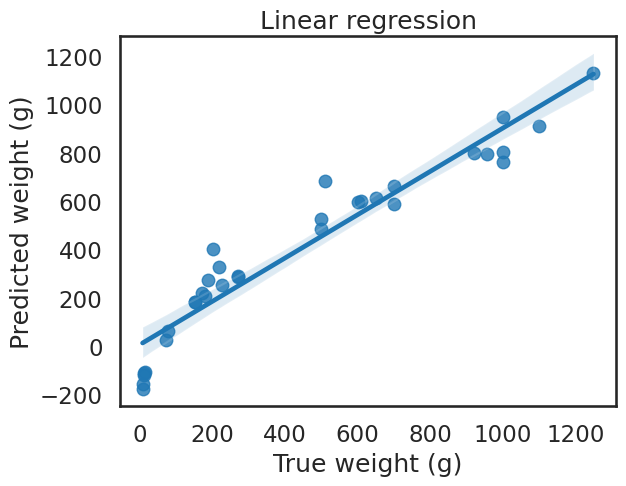

In [7]:
# Let's also plot the predictions against the true values

import matplotlib.pyplot as plt
import seaborn as sns

def plot_predictions(y_test, y_pred, title='Linear regression'):
    sns.set_style("white")
    sns.set_context("talk")
    
    sns.regplot(x=y_test, y=y_pred)
    
    plt.title(title)
    plt.xlabel('True weight (g)')
    plt.ylabel('Predicted weight (g)')
    
plot_predictions(y_test, y_pred)

## Exercise 2: Try other regression models (1 point)

Although linear regression is one of the simplest regression models, it can fit the data really well, especially for feature spaces of multiple dimensions. However, it is not always the best choice. 

Try other regression models from the `sklearn` library and compare their performance to the linear regression model. The interface of all scikit-learn models is quite the same, including `.fit` and `.predict` methods we used earlier for fitting the model to data and making predictions about new data with our linear regression model. 

Some of the more frequently used regressors include **support vector machines** and **decision trees**. You can try the `SVR` (Support Vector Regression) and `RandomForestRegressor` for the task. You can refer to the official documentation for [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) and [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) for more information.

1. Try the `SVR` and `RandomForestRegressor` models. Train them on the training set and evaluate their performance on the testing set using the mean squared error metric. Compare the results with the linear regression model. Which model performs the best?

In [8]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [ ]:
svr = SVR()

...

In [ ]:
rf = RandomForestRegressor()

...

## Preprocessing data

**Standardization** of datasets is a common requirement for many machine learning estimators implemented in scikit-learn. Standarization transform our data in such a way that its distribution will have a mean value 0 and standard deviation of 1. We can achieve this by using the `StandardScaler` from the `sklearn` library. Why does feature standarization often improve the quality of our model's predictions? If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly.

Another common preprocessing step is **normalization**. In this case, the data is scaled to a fixed range - usually [0, 1]. The motivation to use this scaling method includes robustness to very small standard deviations of features and preserving zeros in sparse data. For this purpose, we use the `MinMaxScaler` from the `sklearn` library.

You can read more about those two feature scaling methods in the [Scikit-learn preprocessing docs](https://scikit-learn.org/stable/modules/preprocessing.html).

<center>
<img src="imgs/scaling.png" width="300">
</center>

In [9]:
import sklearn.preprocessing as preprocessing

scaler = preprocessing.StandardScaler()
# scaler = preprocessing.MinMaxScaler()

scaler.fit(X_train) # fit the scaler to the training data

X_train_scaled = scaler.transform(X_train) # scale the training data
X_test_scaled = scaler.transform(X_test) # scale the testing data (using the same scaler!)

In [10]:
model = LinearRegression() # create a model
model.fit(X_train_scaled, y_train) # train the model

y_pred = model.predict(X_test_scaled) # make predictions

mean_squared_error(y_test, y_pred)

12850.974109204657

SVM MSE: 153201.149349777


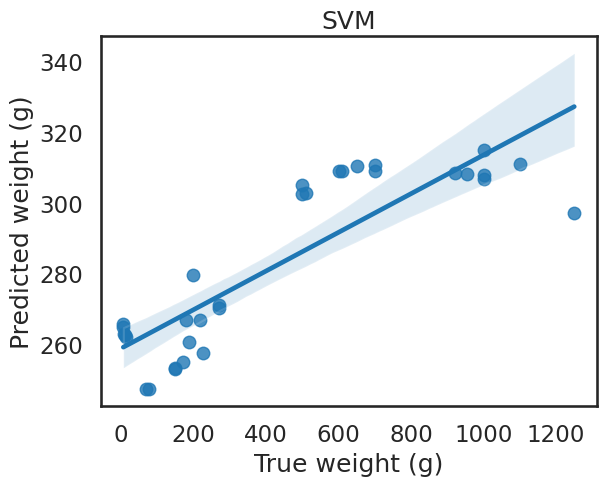

In [16]:
# try other regression models
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)

mean_squared_error(y_test, y_pred)
print('SVM MSE:', mean_squared_error(y_test, y_pred)) # the lower, the better
plot_predictions(y_test, y_pred, title='SVM')

Random Forest MSE: 4649.507010815971


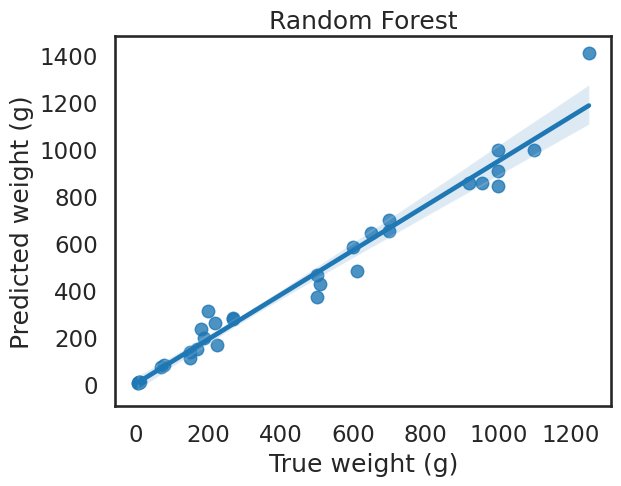

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

mean_squared_error(y_test, y_pred)
print('Random Forest MSE:', mean_squared_error(y_test, y_pred)) # the lower, the better
plot_predictions(y_test, y_pred, title='Random Forest')

## Hyperparameter tuning

While the Random Forest did rather well, the out-of-the-box SVM had trouble correctly fitting to the data. This is often the case with SVMs, as they are very sensitive to their **hyperparameters**. Hyperparameters are parameters of a model that are not directly learned within estimators. Instead, they are to be set by us before fitting the model to data. In scikit-learn, hyperparameters are passed as arguments to the constructor of the estimator classes. We can try to tune the hyperparameters of the SVM to see if we can improve its performance.

For the list of available hyperparametes, check [scikit-learn SVM docs](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html).

In [20]:
 # We can list the current hyperparameters of the SVM model
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Validation set

When we are tuning the hyperparameters of our model, we should not use the testing set to measure the model's performance. If we do, we create an opportunity for a **data leak** - a situation in which a model we constructed is be biased to perform well on a particular test set, because we tuned its hyperparameters to perform well on this set (thus, the data 'leaks' from tho testing set to the model building process). To prevent it, we should first split the training set into two parts: the actual training set and the validation set. We will use the validation set to evaluate the model's performance during hyperparameter tuning. The testing set should be used only once, after we have tuned the hyperparameters and trained the model on the training set.

Validation set SVM MSE: 3987.417377202299


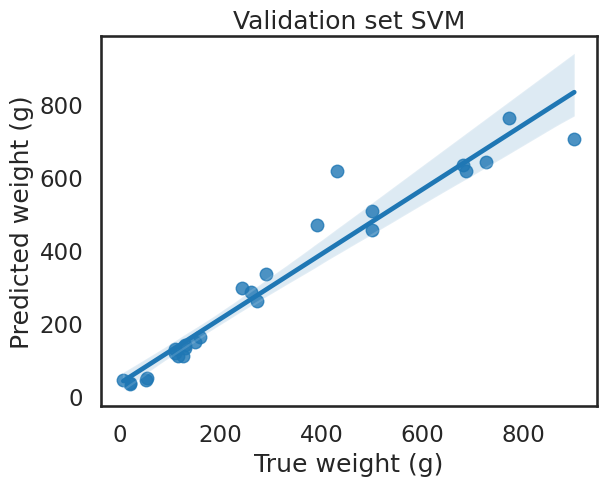

In [51]:
from sklearn.model_selection import GridSearchCV

# We can use the train_test_split function to split the training set into the actual training set and the validation set

# First, we split the data into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, we split the training set into the actual training set and the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Let's try to tune the hyperparameters of the SVM model. We will focus on the 'C', 'gamma', and 'kernel' hyperparameters. Try to find the best combination of hyperparameters.

svr = SVR(
    kernel='rbf',   # can be 'linear', 'poly', 'rbf', 'sigmoid'
    C=40,          # regularization parameter (float in range [0, inf])
    epsilon=0.1,    # epsilon in the epsilon-SVR model (float in range [0, inf])
)

svr.fit(X_train, y_train)
y_pred = svr.predict(X_val)

mean_squared_error(y_val, y_pred)
print('Validation set SVM MSE:', mean_squared_error(y_val, y_pred)) # the lower, the better
plot_predictions(y_val, y_pred, title='Validation set SVM')

## Exercise 4: Cross-validation (1 point)

In [ ]:
# We will define a grid of hyperparameters as a dictionary. The keys are the hyperparameter names, and the values are lists of possible values to try.

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(
    svr, # the model
    param_grid, # the grid of hyperparameters
)

svr = grid_search.fit(X_train, y_train) # GridSearchCV.fit() returns the best model found
y_pred = svr.predict(X_test)

Best hyperparameters: {'C': 40, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Testing set SVM MSE: 25528.893232197075


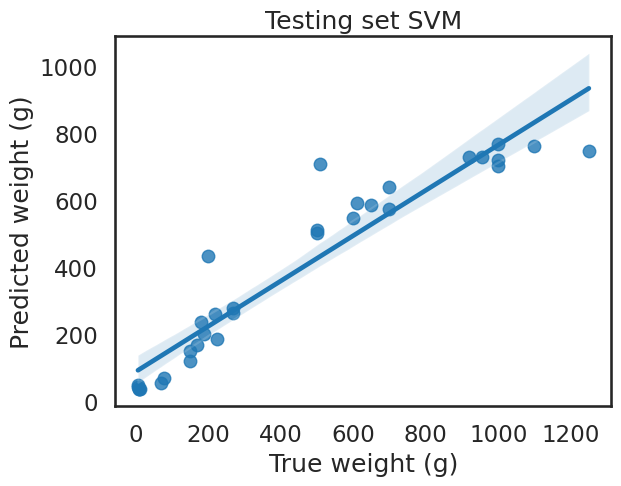

In [52]:
# Report the best hyperparameters and the MSE on the testing set

print('Best hyperparameters:', svr.get_params())

y_pred = svr.predict(X_test)
mean_squared_error(y_test, y_pred)
print('Testing set SVM MSE:', mean_squared_error(y_test, y_pred)) # the lower, the better
plot_predictions(y_test, y_pred, title='Testing set SVM')